<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/05_05_01_dmd_template_simple_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
#Define the functions
def f1(xx, tt):
    lambda1 = -0.2 + 4j    # eigenvalue for mode1
    a1 = 1.0
    y_1 = np.cos(xx) * a1 * np.exp(lambda1 * tt)
    return y_1

def f2(xx, tt):
    lambda2 = +0.4 + 2j    # eigenvalue for mode1
    a2 = 0.5
    y_2 = np.sin(xx) * a2 * np.exp(lambda2 * tt)
    return y_2

In [139]:
#Define time and space discretizations
xi = np.linspace(-2*np.pi, 2*np.pi, 1441)
t = np.linspace(0, 2*np.pi, 721)
dt = t[1] - t[0]
tt, xx = np.meshgrid(t, xi)

noisy = False
if noisy:
        # Calculate the noise levels
        noise_level = 0.0  # Adjust as needed
        noise1 = np.random.normal(scale=noise_level, size=tt.shape)
        noise2 = np.random.normal(scale=noise_level, size=tt.shape)
        f1_noisy = f1(xx, tt) + noise1
        f2_noisy = f2(xx, tt) + noise2
        # Combine the noisy functions
        X = f1_noisy + f2_noisy
else:
        f1 = f1(xx, tt)
        f2 = f2(xx, tt)
        X = f1 + f2


In [140]:
print(dt)

0.008726646259971648


In [141]:
print(X.shape)

(1441, 721)


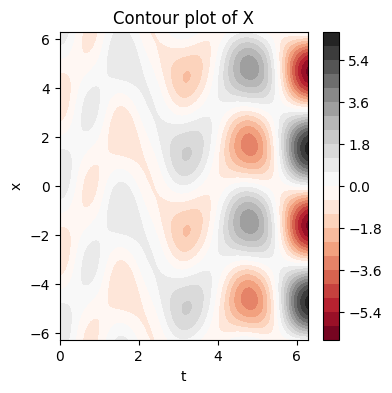

In [142]:
plt.figure(figsize=(4, 4))
plt.contourf(tt, xx, X.real, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of X')
plt.show()

In [1]:
X_1 = X[:, :-1]
X_2 = X[:, 1:]


NameError: name 'X' is not defined

In [144]:
print(X_1.shape, X_2.shape)

(1441, 720) (1441, 720)


In [145]:
U, S, VT = np.linalg.svd(X_1,full_matrices=False)
V=VT.conj().T
S=np.diag(S)
print(U.shape,S.shape, V.shape)


(1441, 720) (720, 720) (720, 720)


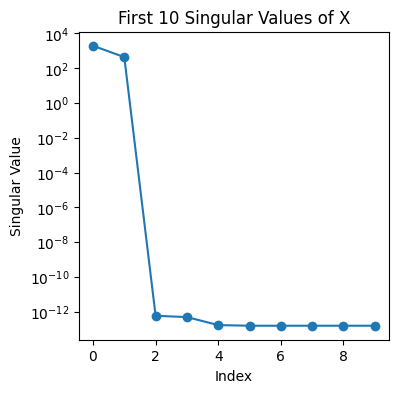

In [146]:
# Singular Values
plt.figure(figsize=(4, 4))
plt.semilogy(np.diag(S[:10]), 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [147]:
print(S[:2,:2])


[[1972.51750884    0.        ]
 [   0.          435.23861204]]


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


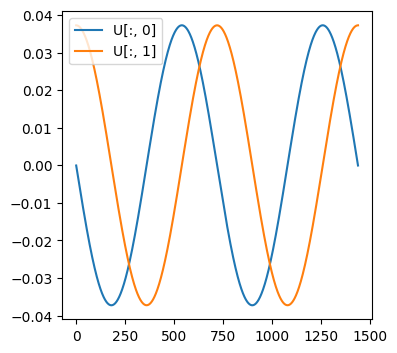

In [148]:
# U
plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
#plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3]/5, label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()

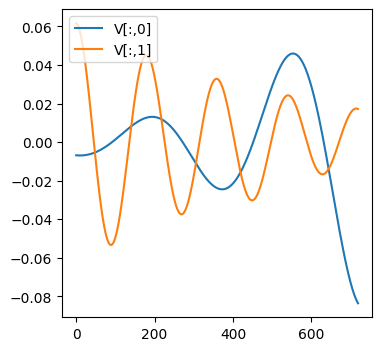

In [149]:
# V
plt.figure(figsize=(4, 4))
plt.plot(V[:,0], label='V[:,0]')
plt.plot(V[:,1], label='V[:,1]')
#plt.plot(V[:,2], label='V[:,2]')
#plt.plot(V[:,3]/5, label='V[:,3]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [150]:
r =2
Ur = U[:,:r]
Sr = S[:r,:r]
Vr = V[:,:r]
print(Ur.shape, Sr.shape, Vr.shape)

(1441, 2) (2, 2) (720, 2)


In [151]:
print(X_2.shape)

(1441, 720)


In [152]:
print(Ur[:r,:r])

[[-6.14350984e-05+0.00051538j  3.72374324e-02+0.00025842j]
 [-3.86495173e-04+0.00050636j  3.72356343e-02+0.0002539j ]]


In [153]:
A_tilde =  (Ur.conj().T) @ X_2 @ Vr @ np.linalg.inv(Sr)

In [154]:
print(A_tilde)

[[ 1.00334281e+00+1.75167984e-02j  2.48777625e-04+5.19664968e-05j]
 [-2.31081870e-04-1.05792215e-04j  9.97649189e-01+3.48352736e-02j]]


In [155]:
Lambda, W = np.linalg.eig(A_tilde)

In [156]:
#Lambda = np.diag(Lambda)
print(Lambda)

[1.00334392+0.01751343j 0.99764808+0.03483864j]


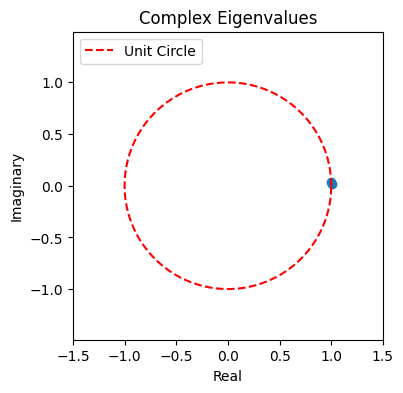

In [157]:
# Plot the eigenvalues in the complex plane
plt.figure(figsize=(4, 4))
plt.scatter(Lambda.real, Lambda.imag)

# Plot unit circle
theta = np.linspace(0, 2*np.pi, 360)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='r', label='Unit Circle')

plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Eigenvalues')
#plt.grid(True)
plt.legend(loc='upper left')
plt.show()

[1.00349676 0.99825619]


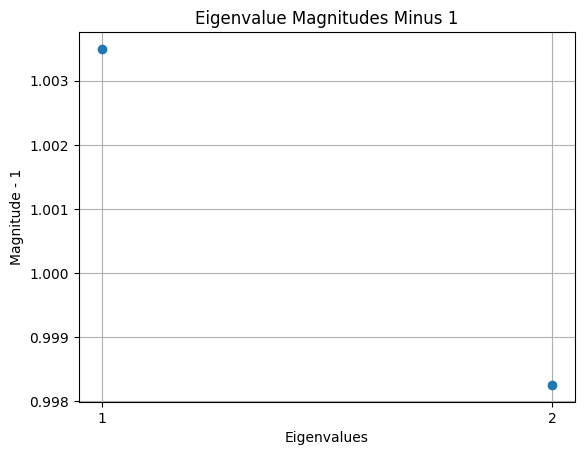

In [158]:
#mag = np.abs(Lambda)
mag = np.sqrt(Lambda.real**2 + Lambda.imag**2)
print(mag)
magm1 = mag

# Create an integer array for x-axis: 1, 2, 3, ...
x_indices = np.arange(1, len(magm1) + 1)

# Plot
plt.figure()
plt.plot(x_indices, magm1, 'o')
plt.xlabel('Eigenvalues')
plt.ylabel('Magnitude - 1')
plt.title('Eigenvalue Magnitudes Minus 1')
plt.grid(True)
plt.xticks(x_indices)
plt.show()

In [159]:
print(W)

[[ 0.99990288+0.j         -0.00155354-0.01384994j]
 [ 0.00155354-0.01384994j  0.99990288+0.j        ]]


In [160]:
#DMD Modes
Phi = X_2 @ Vr @ np.linalg.inv(Sr) @ W

In [161]:
print(Phi[:r,:])

[[ 1.21891429e-16+2.88939879e-16j  3.71444575e-02+1.55526703e-03j]
 [-3.26023308e-04-1.47320505e-05j  3.71430432e-02+1.55520781e-03j]]


In [162]:
#Discrete-time eigenvalues
alpha = np.log(Lambda)/dt

In [163]:
print(alpha.shape)
print(alpha)
print("Notice the imaginary parts", np.imag(alpha))


(2,)
[ 0.4+2.j -0.2+4.j]
Notice the imaginary parts [2. 4.]


In [164]:
# Amplitudes of the DMD modes
amp = np.linalg.lstsq(Phi,X_1[:,0],rcond=None)[0]

In [165]:
print(amp.shape)
print(amp)

(2,)
[-13.35602869+0.60352031j  26.87480108-1.12526861j]


In [166]:
# Eq (10) Dynamics of the DMD modes
t_exp = np.arange(X.shape[1]) * dt

temp = np.repeat(alpha.reshape(-1,1), t_exp.size, axis=1)

dynamics = np.exp(temp * t_exp) * amp.reshape(amp.shape[0], -1)

print(t_exp.shape, temp.shape, dynamics.shape)
print(X.shape[1])
print(t_exp.size)

(721,) (2, 721) (2, 721)
721
721


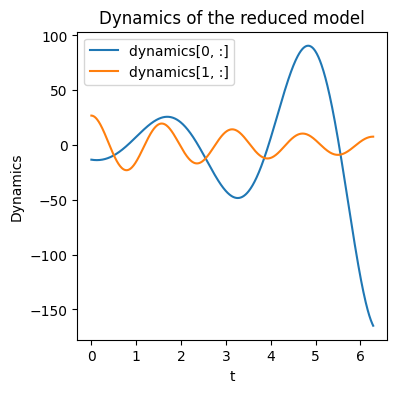

In [167]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.plot(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


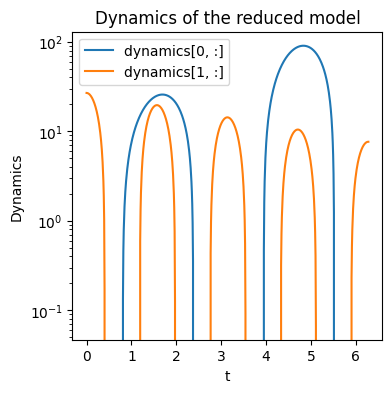

In [168]:
plt.figure(figsize=(4, 4))
plt.semilogy(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.semilogy(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [169]:
# Eq (10) in the notes
# Field Reconstruction

X_dmd = Phi @ dynamics
print(X_dmd.shape)

(1441, 721)


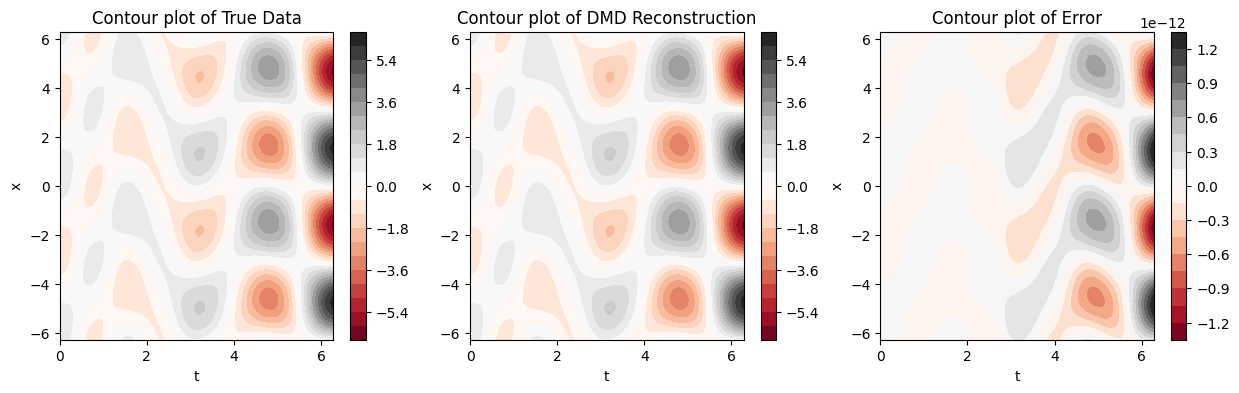

In [170]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of True Data')

plt.subplot(1, 3, 2)
plt.contourf(tt, xx, np.real(X_dmd), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of DMD Reconstruction')

X_diff = np.real(X) - np.real(X_dmd)
#levels = np.linspace(-1E-11, 1E-11, 21)
levels = 20
plt.subplot(1, 3, 3)
plt.contourf(tt, xx, X_diff , levels=levels, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of Error')


plt.show()